In [1]:
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from functools import reduce
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
caracteristics = pd.read_csv('C:/Users/mnhelal/OneDrive - Université Paris 1 Panthéon-Sorbonne/Bureau/Paris/Algorithmique et Python/archive/caracteristics.csv',encoding='latin-1', sep=",") 
places = pd.read_csv('C:/Users/mnhelal/OneDrive - Université Paris 1 Panthéon-Sorbonne/Bureau/Paris/Algorithmique et Python/archive/places.csv', sep=",")
users = pd.read_csv('C:/Users/mnhelal/OneDrive - Université Paris 1 Panthéon-Sorbonne/Bureau/Paris/Algorithmique et Python/archive/users.csv', sep=",")
vehicules = pd.read_csv('C:/Users/mnhelal/OneDrive - Université Paris 1 Panthéon-Sorbonne/Bureau/Paris/Algorithmique et Python/archive/vehicles.csv', sep=",")

C:\Users\mnhelal\AppData\Local\Temp\ipykernel_14208\3722665817.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  caracteristics = pd.read_csv('C:/Users/mnhelal/OneDrive - Université Paris 1 Panthéon-Sorbonne/Bureau/Paris/Algorithmique et Python/archive/caracteristics.csv',encoding='latin-1', sep=",")
C:\Users\mnhelal\AppData\Local\Temp\ipykernel_14208\3722665817.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  places = pd.read_csv('C:/Users/mnhelal/OneDrive - Université Paris 1 Panthéon-Sorbonne/Bureau/Paris/Algorithmique et Python/archive/places.csv', sep=",")


In [3]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [4]:
places = places[places.nbv <= 10]
places['prof'] = places['prof'].replace(0.0, 1.0)

places['plan'] = places['plan'].replace(0.0, 1.0)


places['surf'] = places['surf'].replace(0.0, 1.0)



places['circ'] = places['circ'].replace(0.0, 2.0)


In [5]:
domtom = [971,972,973,974,976,975] #But this doesn't include les Antilles (Martinique or Guadeloupe) cause they're not departements

caracteristics = caracteristics[~caracteristics.dep.isin(domtom)]


In [6]:
caracteristics['lum'] = caracteristics['lum'].replace(0, 1)

caracteristics['int'] = caracteristics['int'].replace(0, 1)

In [7]:
# Dropping les Antilles so we can stay on only le Métropole
caracteristics = caracteristics[caracteristics.gps != "A"]
caracteristics

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0.0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0.0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0.0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0.0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0.0,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837479,200500084521,5,12,30,2000,5,1,1,1.0,2.0,55.0,A7-Sens Marseille vers L,NaN,NaN,NaN,130
837480,200500084522,5,12,31,1230,1,1,1,1.0,6.0,71.0,A51-Sens Aix en Provence,NaN,NaN,NaN,130
837481,200500084523,5,12,31,1412,1,1,1,8.0,7.0,55.0,A7-Sens Marseille vers L,NaN,NaN,NaN,130
837482,200500084524,5,12,31,2020,3,1,1,2.0,7.0,55.0,A55-Sens Martigues vers,NaN,NaN,NaN,130


In [8]:
#le merge 
from functools import reduce
Merge1 = [caracteristics, places]
Merge_1 = reduce(lambda left,right: pd.merge(left,right,on=['Num_Acc'],how='left'),Merge1)


Merge2 = [vehicules, users]
Merge_2 = reduce(lambda left,right: pd.merge(left,right,on=['Num_Acc','num_veh'],how='left'),Merge2)


Merge3 = [Merge_2, Merge_1]

accidents = reduce(lambda left,right: pd.merge(left,right,on=['Num_Acc'],how='left'),Merge3)

In [9]:
missing_values_table(accidents)

Your selected dataframe has 51 columns.
There are 47 columns that have missing values.


,Missing Values,% of Total Values
v2,1818456,95.8
v1,1167200,61.5
long,1090142,57.5
lat,1090132,57.5
gps,1084100,57.1
pr1,969029,51.1
pr,966532,50.9
adr,384301,20.3
voie,188989,10.0
place,121723,6.4


In [9]:
accidents = accidents.drop(['v1', 'v2', 'pr', 'pr1', 'lartpc', 'adr', 'voie','long','lat','gps','locp', 'actp', 'etatp','larrout','env1','vosp','place','manv','obsm','obs','senc'], axis=1)

In [10]:
for i in accidents.columns:
    accidents[i].fillna(accidents[i].mode()[0], inplace=True)
    print(accidents)

              Num_Acc  catv  occutc  choc num_veh  catu  grav  sexe  trajet  \
0        201600000001     7       0   1.0     B02   1.0   1.0   2.0     0.0   
1        201600000001     2       0   7.0     A01   1.0   3.0   1.0     9.0   
2        201600000002     7       0   1.0     A01   1.0   3.0   1.0     5.0   
3        201600000002     7       0   1.0     A01   2.0   3.0   1.0     0.0   
4        201600000002     7       0   1.0     A01   2.0   3.0   2.0     0.0   
...               ...   ...     ...   ...     ...   ...   ...   ...     ...   
1897335  200500087953     7       0   3.0     B01   1.0   1.0   1.0     0.0   
1897336  200500087953     2       0   1.0     A01   1.0   4.0   1.0     5.0   
1897337  200500087953     7       0   1.0     C01   1.0   1.0   1.0     0.0   
1897338  200500087954     7       0   0.0     A01   1.0   4.0   1.0     0.0   
1897339  200500087954     7       0   0.0     A01   2.0   4.0   2.0     0.0   

         secu  ...  com    dep  catr  circ  nbv  pr

              Num_Acc  catv  occutc  choc num_veh  catu  grav  sexe  trajet  \
0        201600000001     7       0   1.0     B02   1.0   1.0   2.0     0.0   
1        201600000001     2       0   7.0     A01   1.0   3.0   1.0     9.0   
2        201600000002     7       0   1.0     A01   1.0   3.0   1.0     5.0   
3        201600000002     7       0   1.0     A01   2.0   3.0   1.0     0.0   
4        201600000002     7       0   1.0     A01   2.0   3.0   2.0     0.0   
...               ...   ...     ...   ...     ...   ...   ...   ...     ...   
1897335  200500087953     7       0   3.0     B01   1.0   1.0   1.0     0.0   
1897336  200500087953     2       0   1.0     A01   1.0   4.0   1.0     5.0   
1897337  200500087953     7       0   1.0     C01   1.0   1.0   1.0     0.0   
1897338  200500087954     7       0   0.0     A01   1.0   4.0   1.0     0.0   
1897339  200500087954     7       0   0.0     A01   2.0   4.0   2.0     0.0   

         secu  ...  com    dep  catr  circ  nbv  pr

              Num_Acc  catv  occutc  choc num_veh  catu  grav  sexe  trajet  \
0        201600000001     7       0   1.0     B02   1.0   1.0   2.0     0.0   
1        201600000001     2       0   7.0     A01   1.0   3.0   1.0     9.0   
2        201600000002     7       0   1.0     A01   1.0   3.0   1.0     5.0   
3        201600000002     7       0   1.0     A01   2.0   3.0   1.0     0.0   
4        201600000002     7       0   1.0     A01   2.0   3.0   2.0     0.0   
...               ...   ...     ...   ...     ...   ...   ...   ...     ...   
1897335  200500087953     7       0   3.0     B01   1.0   1.0   1.0     0.0   
1897336  200500087953     2       0   1.0     A01   1.0   4.0   1.0     5.0   
1897337  200500087953     7       0   1.0     C01   1.0   1.0   1.0     0.0   
1897338  200500087954     7       0   0.0     A01   1.0   4.0   1.0     0.0   
1897339  200500087954     7       0   0.0     A01   2.0   4.0   2.0     0.0   

         secu  ...  com    dep  catr  circ  nbv  pr

              Num_Acc  catv  occutc  choc num_veh  catu  grav  sexe  trajet  \
0        201600000001     7       0   1.0     B02   1.0   1.0   2.0     0.0   
1        201600000001     2       0   7.0     A01   1.0   3.0   1.0     9.0   
2        201600000002     7       0   1.0     A01   1.0   3.0   1.0     5.0   
3        201600000002     7       0   1.0     A01   2.0   3.0   1.0     0.0   
4        201600000002     7       0   1.0     A01   2.0   3.0   2.0     0.0   
...               ...   ...     ...   ...     ...   ...   ...   ...     ...   
1897335  200500087953     7       0   3.0     B01   1.0   1.0   1.0     0.0   
1897336  200500087953     2       0   1.0     A01   1.0   4.0   1.0     5.0   
1897337  200500087953     7       0   1.0     C01   1.0   1.0   1.0     0.0   
1897338  200500087954     7       0   0.0     A01   1.0   4.0   1.0     0.0   
1897339  200500087954     7       0   0.0     A01   2.0   4.0   2.0     0.0   

         secu  ...  com    dep  catr  circ  nbv  pr

              Num_Acc  catv  occutc  choc num_veh  catu  grav  sexe  trajet  \
0        201600000001     7       0   1.0     B02   1.0   1.0   2.0     0.0   
1        201600000001     2       0   7.0     A01   1.0   3.0   1.0     9.0   
2        201600000002     7       0   1.0     A01   1.0   3.0   1.0     5.0   
3        201600000002     7       0   1.0     A01   2.0   3.0   1.0     0.0   
4        201600000002     7       0   1.0     A01   2.0   3.0   2.0     0.0   
...               ...   ...     ...   ...     ...   ...   ...   ...     ...   
1897335  200500087953     7       0   3.0     B01   1.0   1.0   1.0     0.0   
1897336  200500087953     2       0   1.0     A01   1.0   4.0   1.0     5.0   
1897337  200500087953     7       0   1.0     C01   1.0   1.0   1.0     0.0   
1897338  200500087954     7       0   0.0     A01   1.0   4.0   1.0     0.0   
1897339  200500087954     7       0   0.0     A01   2.0   4.0   2.0     0.0   

         secu  ...   com    dep  catr  circ  nbv  p

              Num_Acc  catv  occutc  choc num_veh  catu  grav  sexe  trajet  \
0        201600000001     7       0   1.0     B02   1.0   1.0   2.0     0.0   
1        201600000001     2       0   7.0     A01   1.0   3.0   1.0     9.0   
2        201600000002     7       0   1.0     A01   1.0   3.0   1.0     5.0   
3        201600000002     7       0   1.0     A01   2.0   3.0   1.0     0.0   
4        201600000002     7       0   1.0     A01   2.0   3.0   2.0     0.0   
...               ...   ...     ...   ...     ...   ...   ...   ...     ...   
1897335  200500087953     7       0   3.0     B01   1.0   1.0   1.0     0.0   
1897336  200500087953     2       0   1.0     A01   1.0   4.0   1.0     5.0   
1897337  200500087953     7       0   1.0     C01   1.0   1.0   1.0     0.0   
1897338  200500087954     7       0   0.0     A01   1.0   4.0   1.0     0.0   
1897339  200500087954     7       0   0.0     A01   2.0   4.0   2.0     0.0   

         secu  ...   com    dep  catr  circ  nbv  p

              Num_Acc  catv  occutc  choc num_veh  catu  grav  sexe  trajet  \
0        201600000001     7       0   1.0     B02   1.0   1.0   2.0     0.0   
1        201600000001     2       0   7.0     A01   1.0   3.0   1.0     9.0   
2        201600000002     7       0   1.0     A01   1.0   3.0   1.0     5.0   
3        201600000002     7       0   1.0     A01   2.0   3.0   1.0     0.0   
4        201600000002     7       0   1.0     A01   2.0   3.0   2.0     0.0   
...               ...   ...     ...   ...     ...   ...   ...   ...     ...   
1897335  200500087953     7       0   3.0     B01   1.0   1.0   1.0     0.0   
1897336  200500087953     2       0   1.0     A01   1.0   4.0   1.0     5.0   
1897337  200500087953     7       0   1.0     C01   1.0   1.0   1.0     0.0   
1897338  200500087954     7       0   0.0     A01   1.0   4.0   1.0     0.0   
1897339  200500087954     7       0   0.0     A01   2.0   4.0   2.0     0.0   

         secu  ...   com    dep  catr  circ  nbv  p

In [12]:
missing_values_table(accidents)

Your selected dataframe has 30 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [13]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1897340 entries, 0 to 1897339
Data columns (total 30 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Num_Acc  int64  
 1   catv     int64  
 2   occutc   int64  
 3   choc     float64
 4   num_veh  object 
 5   catu     float64
 6   grav     float64
 7   sexe     float64
 8   trajet   float64
 9   secu     float64
 10  an_nais  float64
 11  an       float64
 12  mois     float64
 13  jour     float64
 14  hrmn     float64
 15  lum      float64
 16  agg      float64
 17  int      float64
 18  atm      float64
 19  col      float64
 20  com      float64
 21  dep      float64
 22  catr     float64
 23  circ     float64
 24  nbv      float64
 25  prof     float64
 26  plan     float64
 27  surf     float64
 28  infra    float64
 29  situ     float64
dtypes: float64(26), int64(3), object(1)
memory usage: 448.7+ MB


In [11]:
#accidents['col'].nunique()
accidents['catv'].nunique()


#['lum', 'int', 'atm', 'col', 'catr', 'circ', 'nbv', 'prof', 'plan', 'surf', 'infra', 'situ', 'catu', 'sexe',    
#'secu', 'choc', 'catv']
#cars(include these in 7): 3-6-8-9-10-11-12
#cars heavy weight(include these in category 13): 14,15
#trucks(include in 21): 16,17, 21
#buses(include in 37): 18,19,37,38,39,40
#2wheels(include in 33): 2, 30,31,32, 35,36,33
#vélos(include in 1):1-4-5, 
#autre; 20,41,42,43,50,60,80,99

#go back to thinking about choc
#catu: normalement y a pas 4 dans les modalités, transorme la en 1
#trajet, a enlever: 0 est valeurs manquantes et elle représente +30% des observations
#secu, discuss it
#int: 2,3..8 regroupe them with 2 and leave 9 at 'autres'
#atm: 5..8 put them in 9
#col: 4 avec 5
#circ: pb valeur manquantes!!!! Rechanger 0 en 2
#nbv: drop les modalités plus que 10
#prof, plann surf: PB DE VALEURS MANQUANTES, 0 en 1
#surf: 3,8 avec 2, 5 avec 7


33

In [12]:
#valeurs manquantes
accidents['catu'] = accidents['catu'].replace(4.0, 1.0)
accidents['circ'] = accidents['circ'].replace(0.0, 2.0)
accidents['prof'] = accidents['prof'].replace(0.0, 1.0)
accidents['plan'] = accidents['plan'].replace(0.0, 1.0)
accidents['surf'] = accidents['surf'].replace(0.0, 1.0)



In [13]:
accidents['catv'] = accidents['catv'].replace([3,6,8,9,10,11,14,13,15,12,7], 'vehicule')
accidents['catv'] = accidents['catv'].replace([16,21, 17], 'tracteur')
accidents['catv'] = accidents['catv'].replace([18,19,38,39,37, 40], 'bus')
accidents['catv'] = accidents['catv'].replace([2,30,31,32, 35,36,33, 34], '2roues')
accidents['catv'] = accidents['catv'].replace([4,5, 1], 'velo')
accidents['catv'] = accidents['catv'].replace([20,41,42,43,50,60,80,99], 'autre')

In [37]:
accidents['catv'].value_counts()

vehicule    1378719
2roues       365426
velo          96360
bus           31585
tracteur      16165
autre          9085
Name: catv, dtype: int64

In [14]:
accidents['int'] = accidents['int'].replace([3.0,4.0,5.0,6.0,7.0,8.0], 2.0)
accidents['atm'] = accidents['atm'].replace([5.0,6.0,7.0,8.0], 9.0)

accidents['col'] = accidents['col'].replace(4.0, 5.0) #collision entre 2 véhicule
accidents['col'] = accidents['col'].replace([1.0,2.0], 3.0) #collision entre 3 véhicules

accidents['catr'] = accidents['catr'].replace([5.0,6.0,7.0], 9.0) #J'ai garder que 4 types de routes


accidents['surf'] = accidents['surf'].replace([3.0,8.0], 2.0)
accidents['surf'] = accidents['surf'].replace(5.0, 7.0)

accidents['choc'] = accidents['choc'].replace([2.0,3.0], 1.0)
accidents['choc'] = accidents['choc'].replace([5.0,6.0], 4.0)



In [15]:
accidents = accidents[accidents.nbv <= 10]

In [16]:
accidents.shape

(1897340, 30)

In [17]:
accidents = accidents.drop_duplicates()
accidents.shape

(1890187, 30)

## One Hot Encoding

In [18]:
df_ohe = accidents.drop(['jour','hrmn','com','num_veh','dep','an_nais','occutc','agg', 'grav', 'trajet'], axis = 1)
#df_ohe = df_ohe.astype(float)
df_ohe

,Num_Acc,catv,choc,catu,sexe,secu,an,mois,lum,int,atm,col,catr,circ,nbv,prof,plan,surf,infra,situ
0,201600000001,vehicule,1.0,1.0,2.0,11.0,16.0,2.0,1.0,1.0,9.0,3.0,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0
1,201600000001,2roues,7.0,1.0,1.0,21.0,16.0,2.0,1.0,1.0,9.0,3.0,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0
2,201600000002,vehicule,1.0,1.0,1.0,11.0,16.0,3.0,1.0,2.0,1.0,6.0,3.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0
3,201600000002,vehicule,1.0,2.0,1.0,11.0,16.0,3.0,1.0,2.0,1.0,6.0,3.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0
4,201600000002,vehicule,1.0,2.0,2.0,11.0,16.0,3.0,1.0,2.0,1.0,6.0,3.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897335,200500087953,vehicule,1.0,1.0,1.0,13.0,5.0,10.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0
1897336,200500087953,2roues,1.0,1.0,1.0,23.0,5.0,10.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0
1897337,200500087953,vehicule,1.0,1.0,1.0,13.0,5.0,10.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0
1897338,200500087954,vehicule,0.0,1.0,1.0,13.0,5.0,10.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0


In [19]:
y = accidents['grav']
y

0          1.0
1          3.0
2          3.0
3          3.0
4          3.0
          ... 
1897335    1.0
1897336    4.0
1897337    1.0
1897338    4.0
1897339    4.0
Name: grav, Length: 1890187, dtype: float64

In [20]:
selected_columns = ['catv', 'choc', 'catu', 'sexe', 'lum', 'atm', 'catr', 'prof', 'surf']
selected_columns_v1 = ['catv', 'choc', 'catu', 'sexe', 'lum', 'atm', 'catr', 'prof', 'surf','infra']

#dropper secu, mois, an, situ (situation de l'accident, je vois pas trop l'interêt de la variable)
#choc, peut-on réduire les modalités?

accidents_ohe = pd.get_dummies(df_ohe, columns =selected_columns)
accidents_ohe = accidents_ohe.drop(['Num_Acc','secu','an','mois','int','col','circ','nbv','plan','situ'], axis = 1)
accidents_ohe

,infra,catv_2roues,catv_autre,catv_bus,catv_tracteur,catv_vehicule,catv_velo,choc_0.0,choc_1.0,choc_4.0,...,prof_1.0,prof_2.0,prof_3.0,prof_4.0,surf_1.0,surf_2.0,surf_4.0,surf_6.0,surf_7.0,surf_9.0
0,0.0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1,0.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0.0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0.0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,0.0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897335,0.0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1897336,0.0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1897337,0.0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1897338,0.0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [64]:
accidents_ohe['catv'].nunique()

KeyError: 'catv'

In [21]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(accidents_ohe)
data_rescaled

In [57]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
reduced = pca.fit_transform(accidents_ohe)

In [58]:
reduced.shape

(1890187, 19)

In [62]:
pd.DataFrame(reduced) #pour ensuite choisir les 3 premiers axes et faire le kmeans dessus

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.404272,0.971418,-0.026760,-0.550309,0.241035,0.614276,-0.472377,-0.559526,-0.333280,-0.229257,-0.012756,-0.013441,0.156111,1.026889,0.594619,-0.080190,-0.043478,-0.053849,-0.049419
1,-0.421925,-0.573425,0.613015,-0.598450,-0.210261,1.008838,0.777341,0.062875,-0.418792,-0.337565,0.296698,0.066156,0.122817,1.027375,0.603055,-0.365079,-0.440817,0.671420,-0.047230
2,-0.423317,-0.265211,0.147448,-1.000089,0.136651,0.009119,-0.578090,-0.084060,-0.303153,-0.253921,-0.073665,-0.043876,-0.104005,-0.056553,0.011774,-0.027451,-0.023022,-0.018354,0.022201
3,-0.415434,0.239970,-0.039873,-1.037749,0.483167,-0.361490,-0.099681,0.972965,-0.377949,-0.237025,-0.103395,-0.341575,-0.140737,-0.026502,-0.008864,0.019113,-0.032451,-0.045894,0.064309
4,-0.405663,1.228496,-0.688926,-0.800611,0.630504,0.046990,0.073043,0.406063,-0.361044,-0.178856,-0.082396,-0.363804,-0.124288,-0.028070,-0.005474,0.027627,-0.044795,-0.048776,0.051890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890182,-0.478578,-0.604537,-0.269315,0.199751,0.023549,-0.207030,-0.784466,0.092372,-0.073314,-0.059843,0.009563,-0.155534,0.032822,-0.020531,-0.023052,-0.063942,-0.017386,-0.014164,-0.017981
1890183,-0.485366,-1.159885,-0.222035,0.383631,0.521183,0.533194,0.090563,0.082822,-0.164669,0.112320,-0.146945,-0.107063,0.099831,-0.031605,-0.018299,-0.212702,0.004959,-0.029347,-0.040192
1890184,-0.478578,-0.604537,-0.269315,0.199751,0.023549,-0.207030,-0.784466,0.092372,-0.073314,-0.059843,0.009563,-0.155534,0.032822,-0.020531,-0.023052,-0.063942,-0.017386,-0.014164,-0.017981
1890185,-0.488358,-0.618633,-0.327775,0.224759,-0.782494,-0.146574,-0.230749,0.153640,-0.053071,-0.273004,0.533162,-0.021542,-0.037264,-0.078144,0.046998,0.048526,-0.513632,-0.658629,0.023245


In [59]:
print(pca.explained_variance_ratio_)

[0.32740959 0.09249933 0.08224073 0.06937341 0.05468202 0.05111574
 0.0482505  0.04247228 0.0396561  0.02392691 0.01808228 0.01731648
 0.01643276 0.0143095  0.01355056 0.01283758 0.01153977 0.01072878
 0.01065939]


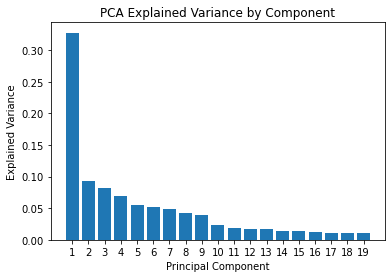

In [39]:
import matplotlib.pyplot as plt

plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xticks(range(len(pca.explained_variance_ratio_)), list(range(1, len(pca.explained_variance_ratio_)+1)))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance by Component')
plt.show()

#On garde les 3 premiers axes (50% de variance)

In [26]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
 X_train, X_test, y_train, y_test = train_test_split(reduced, y, test_size=0.2, random_state=60)

In [28]:
kmeans = KMeans(n_clusters = 10)

In [29]:
accidents_kmeans = kmeans.fit(X_train)

In [264]:
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(n_clusters=10, random_state = 20, init ='k-means++')


In [265]:
accidents_mkmeans = model.fit(X_train)

C:\Users\mnhelal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [266]:
batch_centroids = accidents_mkmeans.cluster_centers_

In [267]:
batch_inertias = []
for i in range(accidents_mkmeans.n_clusters):
    # Select the data points in the cluster
    points = X_train[accidents_mkmeans.labels_ == i]
    # Calculate the inertia of the cluster
    b_inertia = np.sum((points - batch_centroids[i])**2)
    batch_inertias.append(b_inertia)

In [268]:
batch_inertias

[491024.20681583096,
 229181.2747478082,
 312509.34062806406,
 351259.8451909614,
 167203.8801987304,
 346774.80096456094,
 207096.93352492215,
 383236.9041787735,
 381019.95973904646,
 228983.00834446942]

In [83]:
df = pd.DataFrame({'k': range(1, len(batch_inertias)+1), 'interia': batch_inertias})

# Print the data frame
print(df)

    k        interia
0   1  305091.476974
1   2  257913.524981
2   3  425915.017923
3   4  296351.089543
4   5  162101.038016
5   6  350015.588529
6   7  196416.615199
7   8  338049.656557
8   9  278996.687822
9  10  217212.301927


In [30]:
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

In [31]:
inertias

[8253549.365703166,
 5620263.5485964995,
 4976869.710651862,
 4620939.2054933775,
 4228395.313979842,
 4071120.877510129,
 3898828.076191317,
 3773982.3913629605,
 3707769.6844439004,
 3580901.529141588]

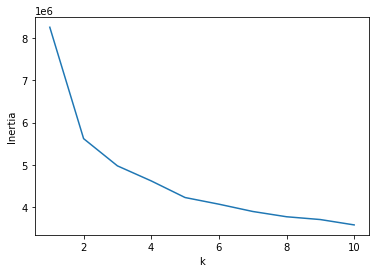

In [32]:
import matplotlib.pyplot as plt


# Plot the inertias as a line plot
plt.plot(range(1,11), inertias)

# Add labels to the plot
plt.xlabel('k')
plt.ylabel('Inertia')

# Show the plot
plt.show()

#On peut choisir entre 2 et 4 pour notre nombre de clusters